Data Diri

Nama : Heru Leonardo

Proyek Akhir Klasifikasi Gambar

1. Langkah pertama import terlebih dahulu semua library yang kiranya akan terpakai

In [ ]:
#main driver
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import zipfile,os,shutil
import numpy as np
from google.colab import drive
from keras.preprocessing import image
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

2. Mount Drive untuk mengupload data yang akan menjadi training model

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
base_dir = '/content/gdrive/MyDrive/RPS'
train_dir = os.path.join(base_dir, 'Train')
validation_dir = os.path.join(base_dir, 'Validation')

In [ ]:
os.listdir(base_dir)

['Train', 'Validation']

3. Buat direktori data training dan validation

In [ ]:
# membuat direktori batu pada direktori data training
train_rock_dir = os.path.join(train_dir, 'rock')
     
# membuat direktori kertas berantakan pada direktori data training
train_paper_dir = os.path.join(train_dir, 'paper')
     
# membuat direktori gunting berantakan pada direktori data training
train_scissors_dir = os.path.join(train_dir, 'scissors')
     
# membuat direktori batu pada direktori data validasi
validation_rock_dir = os.path.join(validation_dir, 'rock')
     
# membuat direktori kertas pada direktori data validasi
validation_paper_dir = os.path.join(validation_dir, 'paper')

# membuat direktori gunting pada direktori data validasi
validation_scissors_dir = os.path.join(validation_dir, 'scissors')

4. Implementasi Augmentasi Gambar

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest',
    validation_split=0.4
)
test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest',
    validation_split=0.4
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,  # direktori data latih
    target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True) # mengacak data sehingga tidak sesuai alfabetik
     
validation_generator = test_datagen.flow_from_directory(
    validation_dir, # direktori data validasi
    target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=True) # mengacak data sehingga tidak sesuai alfabetik

Found 1316 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


5. Buat Model Pelatihan Machine Learning

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

In [ ]:
#loss function 'categorical_crossentropy' 
model.compile(loss = 'categorical_crossentropy', # untuk klasifikasi
              optimizer = 'Adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       2

6. Latih Model Machine Learning

In [ ]:
# latih model dengan model.fit 
history = model.fit(
          train_generator,
          steps_per_epoch=41,  # berapa batch yang akan dieksekusi pada setiap epoch
          epochs=10, # tambahkan eposchs jika akurasi model belum optimal
          validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
          validation_steps=27,  # berapa batch yang akan dieksekusi pada setiap epoch
          verbose=2
)

Epoch 1/10
41/41 - 86s - loss: 0.1090 - accuracy: 0.9657 - val_loss: 0.3036 - val_accuracy: 0.8947
Epoch 2/10
41/41 - 86s - loss: 0.1342 - accuracy: 0.9548 - val_loss: 0.0813 - val_accuracy: 0.9745
Epoch 3/10
41/41 - 85s - loss: 0.0765 - accuracy: 0.9712 - val_loss: 0.0524 - val_accuracy: 0.9873
Epoch 4/10
41/41 - 85s - loss: 0.0790 - accuracy: 0.9813 - val_loss: 0.0946 - val_accuracy: 0.9734
Epoch 5/10
41/41 - 85s - loss: 0.0692 - accuracy: 0.9766 - val_loss: 0.1231 - val_accuracy: 0.9734
Epoch 6/10
41/41 - 85s - loss: 0.1261 - accuracy: 0.9572 - val_loss: 0.0692 - val_accuracy: 0.9803
Epoch 7/10
41/41 - 85s - loss: 0.0556 - accuracy: 0.9836 - val_loss: 0.1080 - val_accuracy: 0.9745
Epoch 8/10
41/41 - 85s - loss: 0.0532 - accuracy: 0.9805 - val_loss: 0.0963 - val_accuracy: 0.9734
Epoch 9/10
41/41 - 85s - loss: 0.0843 - accuracy: 0.9727 - val_loss: 0.0552 - val_accuracy: 0.9850
Epoch 10/10
41/41 - 85s - loss: 0.0397 - accuracy: 0.9860 - val_loss: 0.0539 - val_accuracy: 0.9850


7.  Coba Plot Training dan Validation apakah sudah sesuai

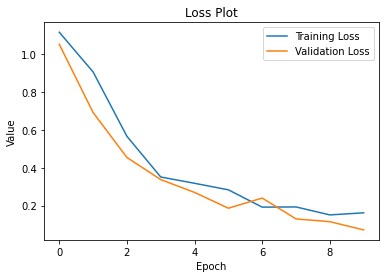

In [ ]:
from matplotlib import pyplot as plt
#loss train & validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

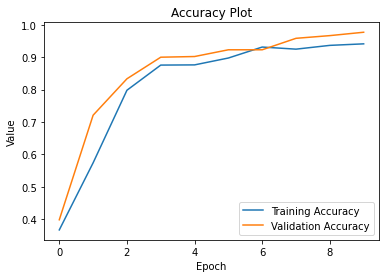

In [ ]:
#accuracy train & validation
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

8. Coba prediksi Gambar dengan menggunakan model Machine Learning yang telah dibuat

Saving WhatsApp Image 2021-06-19 at 18.52.49.jpeg to WhatsApp Image 2021-06-19 at 18.52.49.jpeg
WhatsApp Image 2021-06-19 at 18.52.49.jpeg
paper


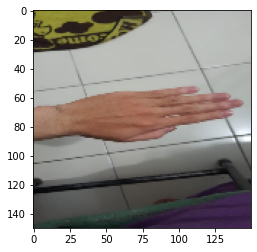

In [ ]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():

  # memprediksi gambar
  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')